In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("car features and msrp data.csv")

In [3]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [5]:
df.shape,df.size

((11914, 16), 190624)

In [6]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [7]:
# Drop non-numeric or irrelevant columns
df_clean = df.drop(columns=['Make', 'Model', 'Year', 'Engine Fuel Type', 
                            'Transmission Type', 'Driven_Wheels', 
                            'Market Category', 'Vehicle Size', 
                            'Vehicle Style', 'Popularity', 'Number of Doors'],
                   errors='ignore')

# Remove rows with missing values
df_clean = df_clean.dropna()




In [8]:
df_clean.head()

,Engine HP,Engine Cylinders,highway MPG,city mpg,MSRP
0,335.0,6.0,26,19,46135
1,300.0,6.0,28,19,40650
2,300.0,6.0,28,20,36350
3,230.0,6.0,28,18,29450
4,230.0,6.0,28,18,34500


In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11816 entries, 0 to 11913
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine HP         11816 non-null  float64
 1   Engine Cylinders  11816 non-null  float64
 2   highway MPG       11816 non-null  int64  
 3   city mpg          11816 non-null  int64  
 4   MSRP              11816 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 553.9 KB


In [10]:
# Display numeric columns
df_clean.describe()

,Engine HP,Engine Cylinders,highway MPG,city mpg,MSRP
count,11816.000000,11816.000000,11816.000000,11816.000000,1.181600e+04
mean,249.514472,5.650051,26.319736,19.326845,4.057590e+04
std,109.261297,1.752333,7.442964,6.527183,6.032038e+04
min,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,170.000000,4.000000,22.000000,16.000000,2.099000e+04
50%,227.000000,6.000000,26.000000,18.000000,2.996500e+04
75%,300.000000,6.000000,30.000000,22.000000,4.220500e+04
max,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


# Correlation Matrix

In [11]:
corr_matrix = df_clean.corr()
corr_matrix

,Engine HP,Engine Cylinders,highway MPG,city mpg,MSRP
Engine HP,1.000000,0.779988,-0.414344,-0.466001,0.662269
Engine Cylinders,0.779988,1.000000,-0.620346,-0.637872,0.544553
highway MPG,-0.414344,-0.620346,1.000000,0.847044,-0.199271
city mpg,-0.466001,-0.637872,0.847044,1.000000,-0.225547
MSRP,0.662269,0.544553,-0.199271,-0.225547,1.000000


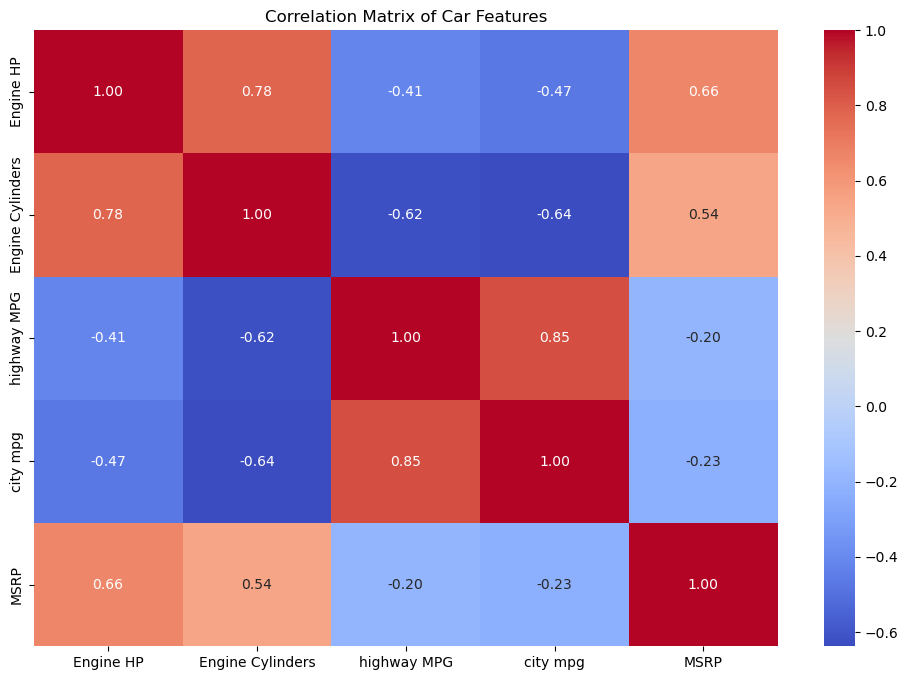

In [12]:

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Car Features")
plt.show()


## Typical findings in car data:

- Features like Engine HP and MSRP often show a strong positive correlation (higher horsepower, higher price).
- City mpg and highway MPG are usually strongly positively correlated.
- Engine Cylinders may correlate with Engine HP and MSRP.
- MPG features may show negative correlation with Engine HP or Cylinders (more power, less efficiency).

# Covariance Matrix


measures how two numeric variables change together

In [13]:
cov_matrix = df_clean.cov()
cov_matrix

,Engine HP,Engine Cylinders,highway MPG,city mpg,MSRP
Engine HP,1.193803e+04,149.338158,-336.955961,-332.337528,4.364802e+06
Engine Cylinders,1.493382e+02,3.070669,-8.090892,-7.295852,5.756000e+04
highway MPG,-3.369560e+02,-8.090892,55.397718,41.150756,-8.946502e+04
city mpg,-3.323375e+02,-7.295852,41.150756,42.604124,-8.880278e+04
MSRP,4.364802e+06,57559.998223,-89465.024896,-88802.775868,3.638548e+09


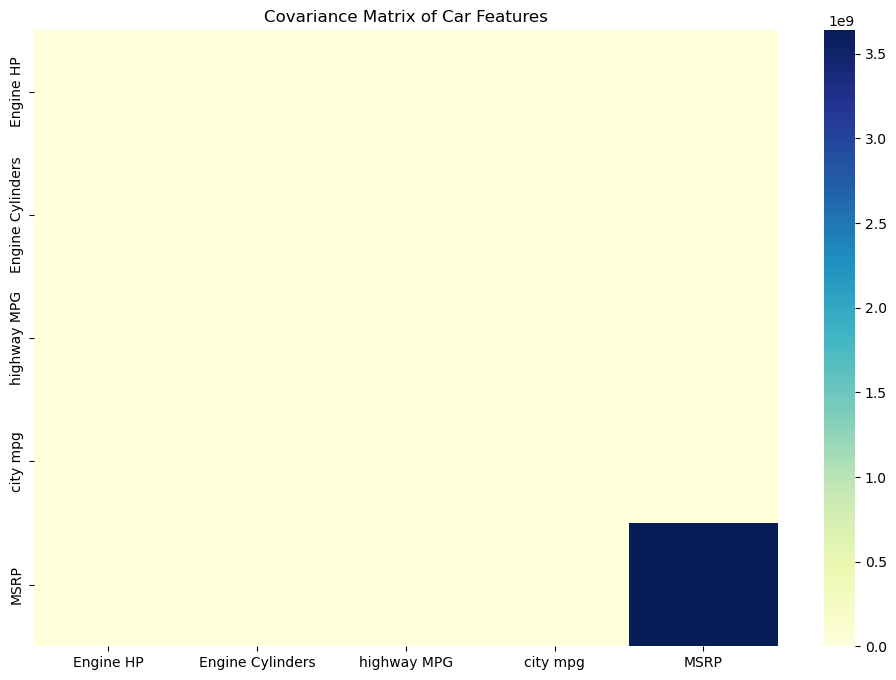

In [14]:

plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=False, cmap="YlGnBu")
plt.title("Covariance Matrix of Car Features")
plt.show()


- The color bar on the right shows a range up to ~3.5e9 (3.5 billion)
- The cells with lower covariances (e.g., between Engine HP and Engine Cylinders) are very small in comparison, so they appear as nearly the same (pale yellow).



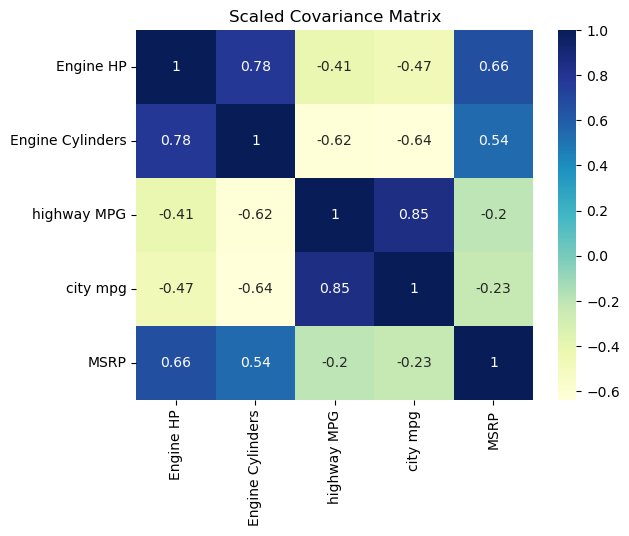

In [15]:
from sklearn.preprocessing import StandardScaler

scaled = StandardScaler().fit_transform(df_clean)
scaled_df = pd.DataFrame(scaled, columns=df_clean.columns)

cov_matrix = scaled_df.cov()
sns.heatmap(cov_matrix, annot=True, cmap='YlGnBu')
plt.title("Scaled Covariance Matrix")
plt.show()


# Findings
- Horsepower & MSRP are positively correlated – stronger engine → higher price.
- Fuel efficiency (MPG) is negatively correlated with both Horsepower and Cylinders – more power, less efficiency.
- City MPG and Highway MPG are strongly correlated – as expected.
- MSRP vs. MPG is weakly negative – expensive cars tend to be less fuel efficient, but not strongly so.



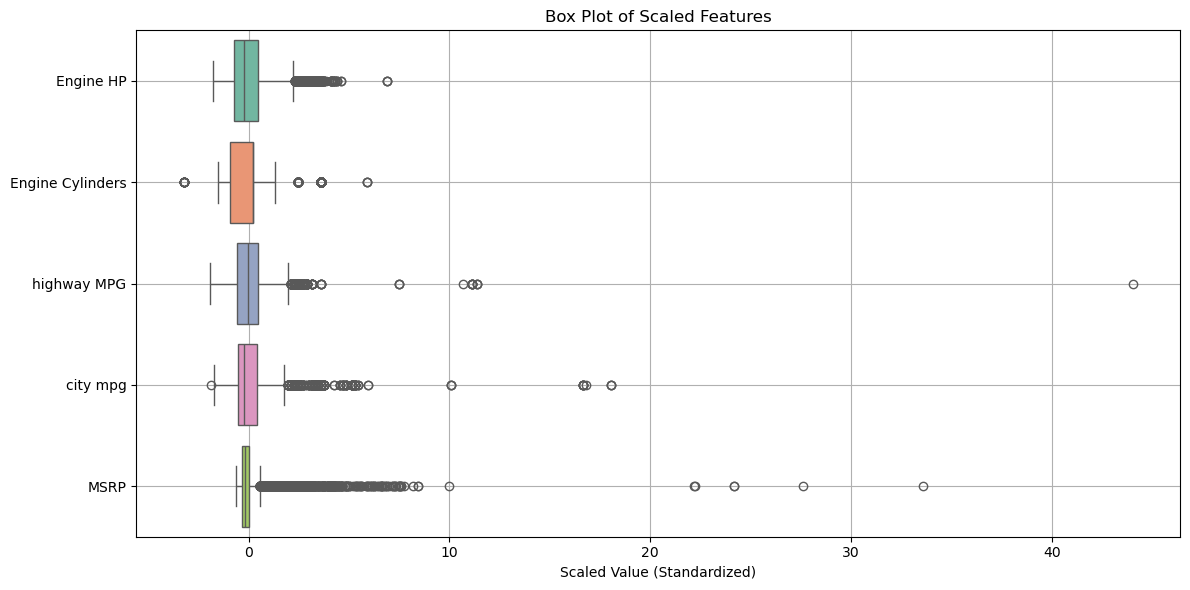

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=scaled_df, orient='h', palette='Set2')
plt.title("Box Plot of Scaled Features")
plt.xlabel("Scaled Value (Standardized)")
plt.grid(True)
plt.tight_layout()
plt.show()


# Pair plot to visualize relationships

Visualize relationships, spread, trends

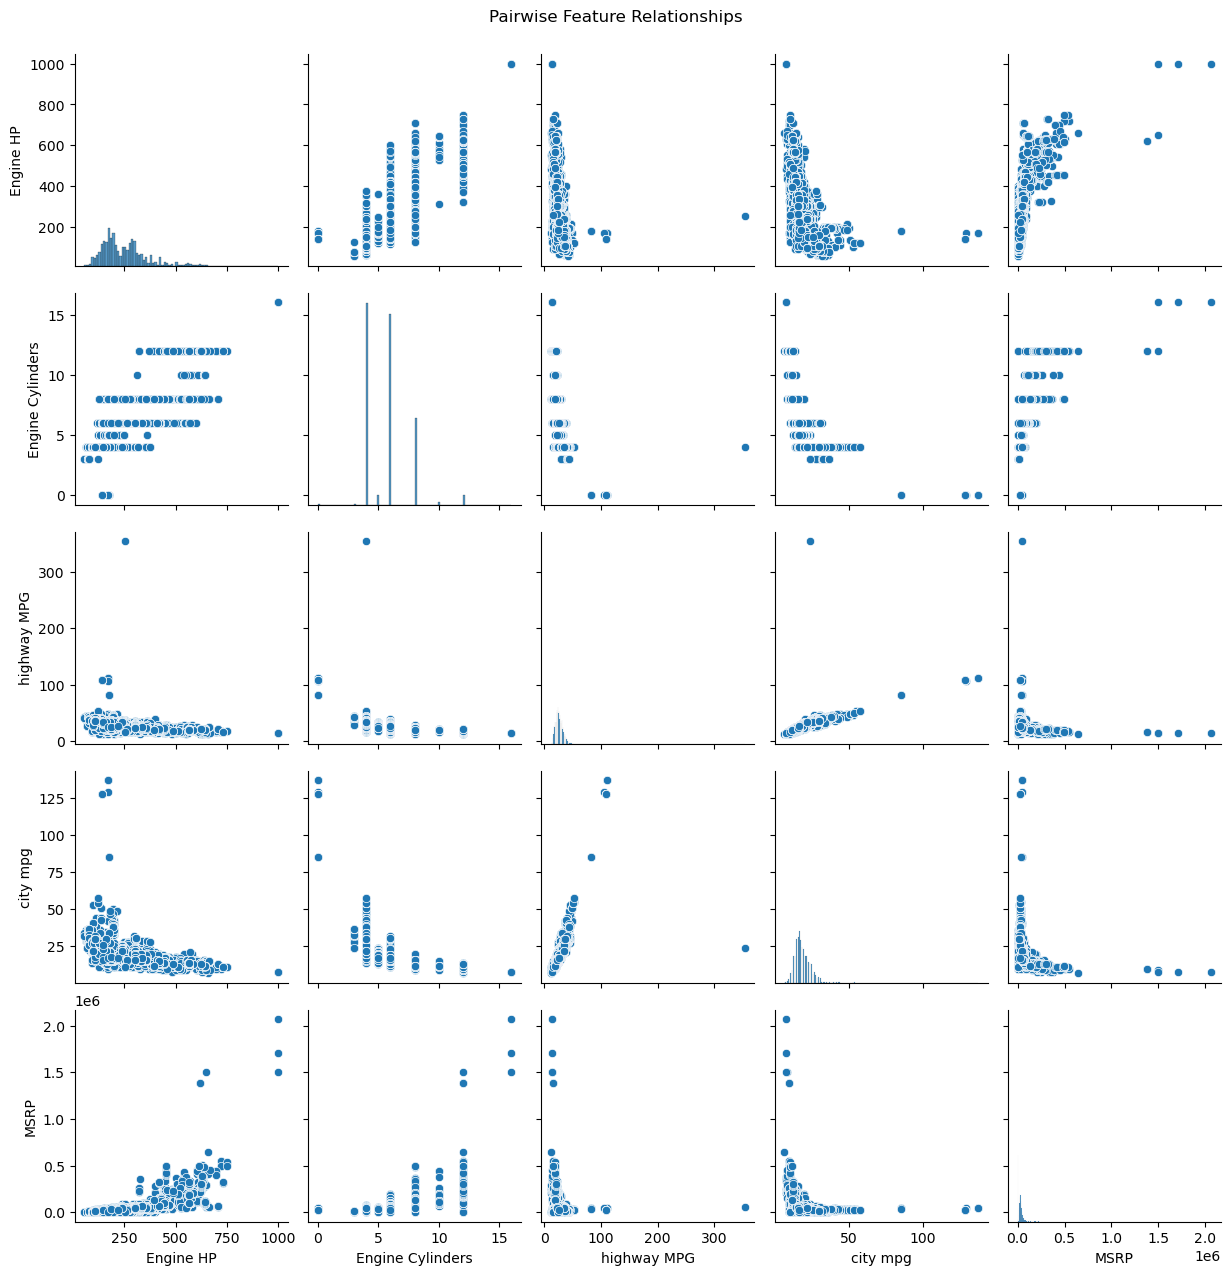

In [17]:
sns.pairplot(df_clean[['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'MSRP']])
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


# Findings in Pairplot
1. Engine HP vs. MSRP
   - Clear upward trend: higher horsepower → higher MSRP.
2. Engine Cylinders
   - More cylinders → more HP → higher MSRP.
3. Highway MPG vs. City MPG
   - Strong linear relationship: high city MPG → high highway MPG.
4. MPG (Highway or City) vs. MSRP
   - Negative curved pattern: better mileage → lower MSRP.
   - Most fuel-efficient cars are in lower price ranges.

# One-hot Encoding